# Test GAIA M67 DR2
### Packages

In [6]:
import astropy.units as u  # Simplify unity manipulation
from astropy.coordinates import SkyCoord # To handle sky/space coordinates
from astroquery.gaia import Gaia
import astropy.io.votable

from pylab import rcParams
import numpy as np
import matplotlib.pyplot as plt

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Useful Fonctions 

In [7]:
# Perform a cone search
# Return a astropy.table.table.Table
def cone_search(ra, dec, radius, dump_to_file=False, table="gaiadr2.gaia_source"):
    job = Gaia.launch_job_async(\
    """ SELECT * FROM {table} 
        WHERE CONTAINS(
        POINT('ICRS',{table}.ra,{table}.dec),
        CIRCLE('ICRS',{ra:.10f},{dec:.10f},{radius:.10f})) = 1
        AND abs(pmra_error/pmra)<0.10
        AND abs(pmdec_error/pmdec)<0.10
        AND abs(parallax_error/parallax)<0.10
        ;"""\
        .format(table=table, ra=ra, dec=dec, radius=radius), dump_to_file=dump_to_file)
    return job.get_results()

#AND abs(pmra_error/pmra)<0.10 \
#AND abs(pmdec_error/pmdec)<0.10 \
#AND pmra IS NOT NULL AND abs(pmra)>0 \
#AND pmdec IS NOT NULL AND abs(pmdec)>0 \

In [17]:
def plotting(cluster_candidates):
    rcParams['figure.figsize'] = 14, 21
    f, axarr = plt.subplots(3, 2)

    axarr[0,0].scatter(cluster_candidates["ra"], cluster_candidates["dec"], s=0.01, c="#000000")
    axarr[0,0].set_xlabel(r"$\alpha$")
    axarr[0,0].set_ylabel(r"$\delta$")

    axarr[0,1].scatter(cluster_candidates["l"], cluster_candidates["b"], s=0.01, c="#000000")
    axarr[0,1].set_xlabel(r"l")
    axarr[0,1].set_ylabel(r"b")

    axarr[1,0].scatter(cluster_candidates["l"], cluster_candidates["parallax"], s=0.01, c="#000000")
    axarr[1,0].set_xlabel(r"l")
    axarr[1,0].set_ylabel(r"p (mas)")
    axarr[1,0].set_ylim([-1,4])

    axarr[1,1].scatter(cluster_candidates["ra"], cluster_candidates["pmra"], s=0.01, c="#000000")
    axarr[1,1].set_xlabel(r"$\alpha$")
    axarr[1,1].set_ylabel(r"PM RA (mas/yr)")
    axarr[1,1].set_ylim([-40,40])

    axarr[2,0].scatter(cluster_candidates["pmdec"], cluster_candidates["pmra"], s=0.01, c="#000000")
    axarr[2,0].set_xlabel(r"PM DEC (mas/yr)")
    axarr[2,0].set_ylabel(r"PM RA (mas/yr)")
    axarr[2,0].set_xlim([-40,40])
    axarr[2,0].set_ylim([-40,40])

    axarr[2,1].scatter(cluster_candidates["parallax"], cluster_candidates["pmra"], s=0.01, c="#000000")
    axarr[2,1].set_xlabel(r"p (mas)")
    axarr[2,1].set_ylabel(r"PM RA (mas/yr)")
    axarr[2,1].set_xlim([-1,4])
    axarr[2,1].set_ylim([-40,40])

    f.subplots_adjust(hspace=0.5)
    plt.show()

### Initialisation

In [15]:
# Get the coords of "M67"
M67_coord = SkyCoord.from_name("M67")
M67_coord = SkyCoord.from_name("NGC2516")

radius = 3
dump_to_file = False

### Main

Query finished.


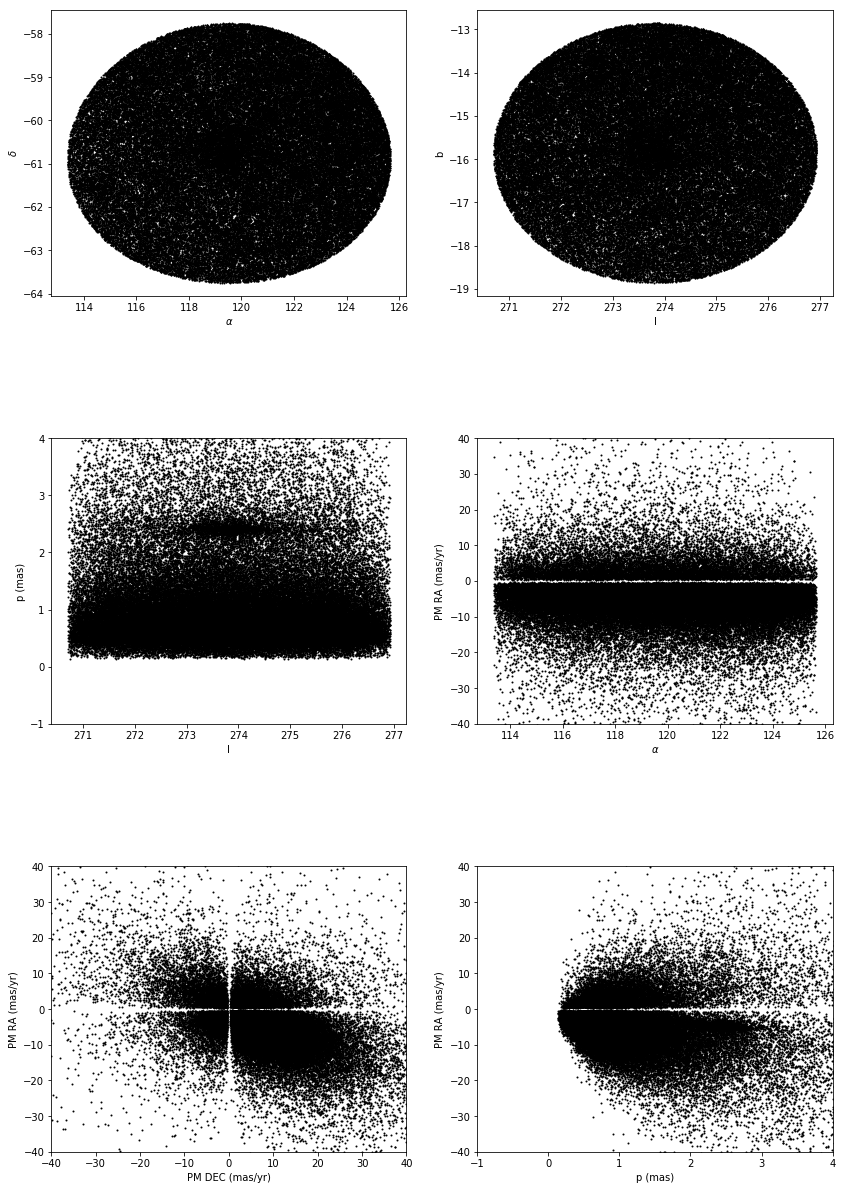

In [16]:
# Get the coords of "M67"
M67_table = cone_search(M67_coord.ra.deg, M67_coord.dec.deg, radius, dump_to_file)

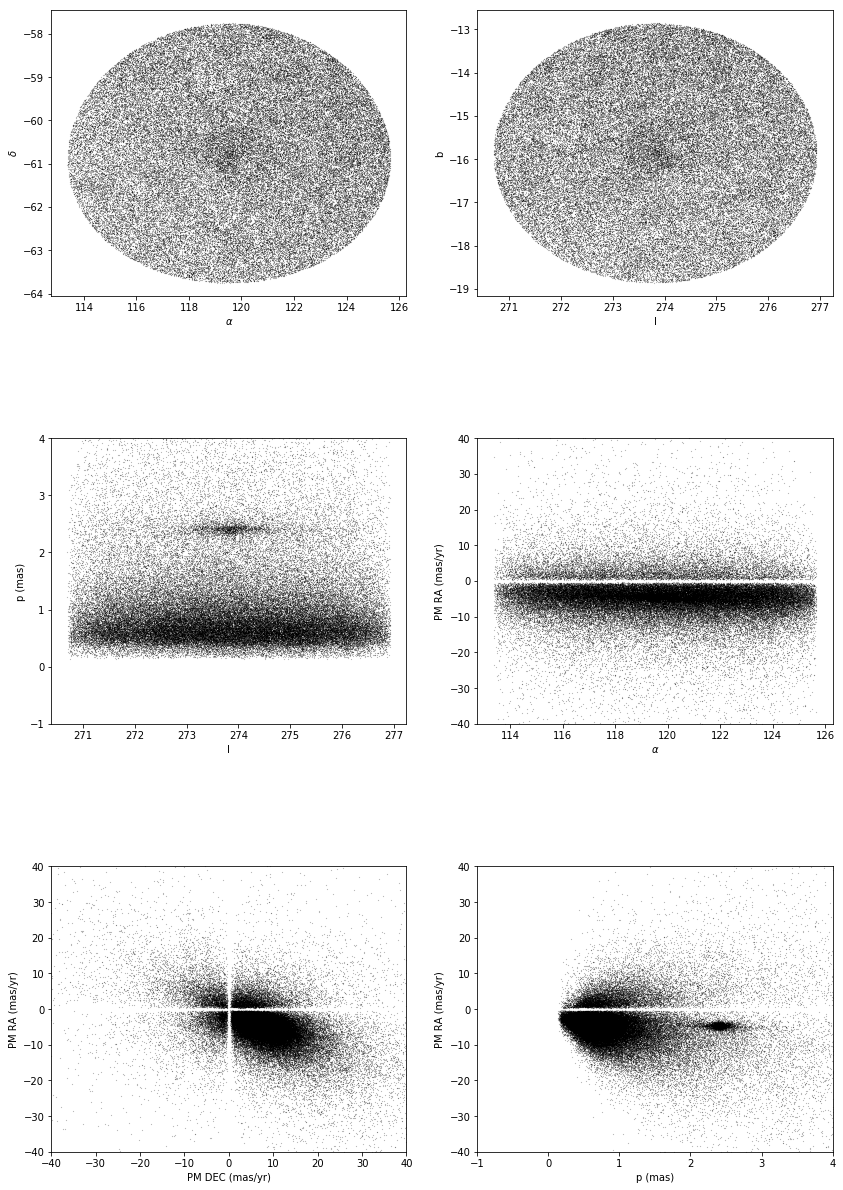

In [18]:
plotting(M67_table)